<a href="https://qworld.net" target="_blank" align="left"><img src="./images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b>Hadamard Operator</b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>


An example quantum operator for quantum coin-flipping is Hadamard. 

It is defined as H-gate in ProjectQ (which you might recall is similar to Qiskit)

We implement all three experiments by using ProjectQ. Here we present the first and third experiment. The second experiment will be presented later.

_This will be a warm-up step before introducing a quantum bit more formally._  

<h3> The first experiment</h3>

Our quantum bit (<b>qubit</b>) starts in state 0, which is shown as $ \ket{0} = \myvector{1 \\ 0} $.

<i>$ \ket{\cdot} $ is called ket-notation:  Ket-notation is used to represent a column vector in quantum mechanics. 
For a given column vector $ \ket{v} $, its conjugate transpose is a row vector represented as $ \bra{v} $ (bra-notation). 
</i>

<h4> The circuit with a single Hadamard </h4>

We design a circuit with one qubit and apply quantum coin-flipping once.

Measured: 0
(<Figure size 204.9x144 with 1 Axes>, <AxesSubplot:>)
The design of the circuit is done.


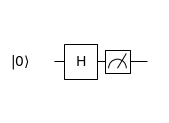

In [1]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them
qubit = eng.allocate_qureg(1)

# Apply H-gate (Recall :H-Gate is our quantum "coin-flipping" gate) to the first qubit
H | qubit[0]

# Flush circuit to backend
eng.flush()

# Measure qubit value and extract it out
Measure | qubit

# Print the measured output
print("Measured: {}".format(int(qubit[0])))

# Print the circuit out
print(drawing_engine.draw())

# Confirm circuit run
print("The design of the circuit is done.")

<img src="./images/photon1.jpg" width="40%">

{'Zero': 4974, 'One': 5026}
State 0 is observed with frequency % 49.74
State 1 is observed with frequency % 50.26


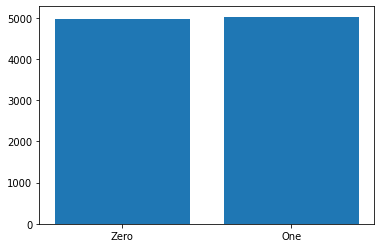

In [2]:
# Let us create a dictionary to store measurements
measurement_dict = {"Zero":0, "One":0}

# Looping over the circuit 10000 times
"The circuit resets after each mesurement back to its initial state hence we are looping over the gates as well"
for i in range(10000):
    # Apply H-gate
    H | qubit[0]
    # Flush circuit to backend
    eng.flush()
    # Measure qubit value and extract it out
    Measure | qubit

    # Segregate measured value into dictionaries
    if (int(qubit[0]) == 0):
        measurement_dict["Zero"] += 1
    else:
        measurement_dict["One"] += 1

# Print values
print(measurement_dict)
print("State 0 is observed with frequency %",100*measurement_dict["Zero"]/(10000))
print("State 1 is observed with frequency %",100*measurement_dict["One"]/(10000))

# Plot histogram using matplotlib
import matplotlib.pyplot as plt

# Plot Dictionary keys and values in a bar plot
plt.bar(list(measurement_dict.keys()), measurement_dict.values())

# Show plot
plt.show()

The numbers of outcomes '0's and '1's are expected to be close to each other.

<img src="./images/photon2.jpg" width="40%" align="left">

<b style="color:black;"> As we have observed after this implementation, quantum systems output probabilistically.</b>

<h3> The third experiment </h3>

_We will examine the second experiment later because it requires intermediate measurement. (We can do intermediate measurements in simulators, but it is not possible in the real machines.)_

Now, we implement the third experiment.

<img src="./images/photon6.jpg" width="60%" align="left">

<h4> The circuit with two Hadamards </h4>

We design a circuit with one qubit and apply quantum coin-flipping twice.

Measured: 0
(<Figure size 258.6x144 with 1 Axes>, <AxesSubplot:>)
The design of the circuit is done.


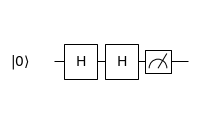

In [3]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
drawing_engine = CircuitDrawerMatplotlib()
eng = MainEngine(backend = Simulator(), engine_list = [drawing_engine]+get_engine_list())

# Define number of qubits and allocate them. Lets name them qreg
qubit = eng.allocate_qureg(1)

# Apply H-gate to qubit twice.
H | qubit
H | qubit

# Flush circuit to backend
eng.flush()

# Measure qubit value and extract it out
Measure | qubit

# Print the measured output
print("Measured: {}".format(int(qubit[0])))

# Print the circuit out
print(drawing_engine.draw())

# Confirm circuit run
print("The design of the circuit is done.")

In [4]:
# execute the circuit 10000 times in the local simulator

# Let us create a dictionary to store measurements
measurement_dict = {"Zero":0, "One":0}

# Looping over the circuit 10000 times. Apply gates and measure.
for i in range(10000):
    H | qubit
    H | qubit
    eng.flush()
    Measure | qubit
    
    if (int(qubit[0]) == 0):
        measurement_dict["Zero"] += 1
    else:
        measurement_dict["One"] += 1
        
# Print values
print(measurement_dict)

{'Zero': 10000, 'One': 0}


The <u>only outcome</u> must be '0'.

<img src="./images/photon7.jpg" width="60%" align="left">

<h3> Task 1 </h3>

Remember that x-gate flips the value of a qubit.

Design a quantum circuit with a single qubit.

The qubit is initially set to $ \ket{0} $.

Set the value of qubit to $ \ket{1} $ by using x-gate.

Experiment 1: Apply one Hadamard gate, make measurement, and execute your program 10000 times.

Experiment 2: Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

The following two diagrams represent these experiments.

<table>
    <tr>
        <td><img src="./images/photon8.jpg" width="80%"></td>
        <td><img src="./images/photon9.jpg" width="70%"></td>
    </tr>
</table>

In [ ]:
#
# your solution is here
#


<a href="Q20_Hadamard_Solution_ProjectQ.ipynb#task1">click for our solution</a>